In [58]:
# importing the libraries needed for this task

import pandas as pd
import numpy as np
import re # i need it for the task 2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [59]:
# task 1: create two functions for reading .gff and .bed formats

def read_gff(path_to_gff):
    """ function to read the .gff file """
    column_names=["chromosome","source","type","start","end","score","strand","phase","attributes"] # set the column names
    gff_data = pd.read_csv(path_to_gff, sep='\t', names=column_names) # read the file
    gff_data = gff_data[gff_data.chromosome.str.startswith("#") == False] # skip the commented lines
    gff_data = gff_data.astype({'start': 'int', 'end': 'int'}) # set the int type for start and end
    return gff_data.reset_index(drop=True) # reset index so that after commentaries skipping indexation will be ok


def read_bed6(path_to_bed6):
    """ function to read the .bed file """
    column_names = ["chromosome", "start", "end", "name", "score", "strand"] # set the column names
    bed_data = pd.read_csv(path_to_bed, sep = "\t", names=column_names) # read the file
    return bed_data

In [60]:
# test of the read_gff function from task 1

path_to_gff = "./rrna_annotation.gff"
gff_df = read_gff(path_to_gff)
gff_df

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [61]:
# test of the read_bed6 function from task 1

path_to_bed = "./alignment.bed" # in physical world my own path to bed is the best part of my day (just joking)
bed_df = read_bed6(path_to_bed)
bed_df

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [62]:
# task 2: shorten the information in the attributes column

pattern = r'.*=(.*)_.*' # regexp with the needed information in the first group
gff_df["attributes"] = gff_df["attributes"].apply(lambda x: re.sub(pattern, r'\1', x)) 

In [63]:
# task 3.1: for each chromosome count the number of each rRNAs types (table)

# I renamed the columns so that their names would correspond to the reference barplot
chromosome_rRNA_count = gff_df\
    .groupby(['chromosome', 'attributes'])\
    .agg({'attributes': 'count'})\
    .rename(columns={'attributes': 'Count'})\
    .reset_index()\
    .rename(columns={'chromosome': 'Sequence', 'attributes': 'RNA type'}) # that's the table for the plot
chromosome_rRNA_count

,Sequence,RNA type,Count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


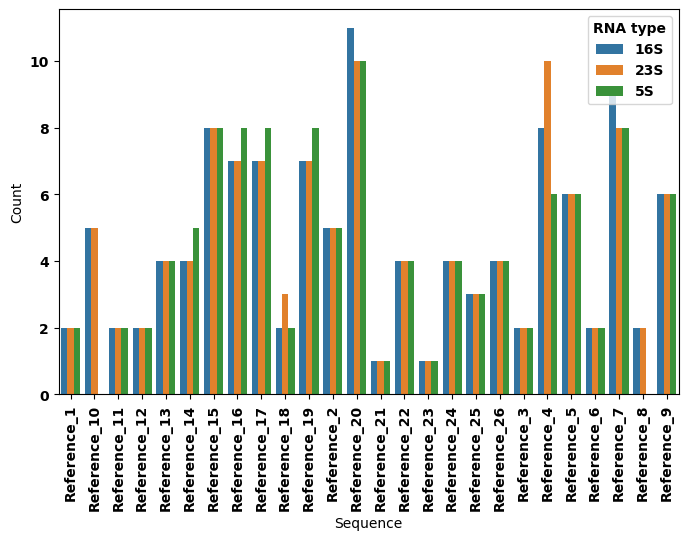

In [64]:
# task 3.2: for each chromosome count the number of each rRNAs types (barplot)

count_rRNA = sns.barplot(data=chromosome_rRNA_count, x="Sequence", y="Count", hue="RNA type")
sns.move_legend(count_rRNA, "upper right")
plt.xticks(rotation=90);

In [65]:
# task 4: create something like bedtools intersect

gff_for_intersect = gff_df\
    .rename(columns={
        'start': 'start_x', 
        'end': 'end_x'
        }) # renamed columns
bed_for_intersect = bed_df\
    .rename(columns={
        'start': 'start_y', 
        'end': 'end_y'
        }) # renamed columns

""" 
Now I want to merge two tebles; using usual merge parameters I will get a giant table with all possible combinations 
of contigs that share the same chromosome number. I will then use query to leave the contigs that are intersected only.
"""

gff_bed_intersect = gff_for_intersect\
    .merge(bed_for_intersect, left_on='chromosome', right_on='chromosome') # merged, now there are all combinations

gff_bed_intersect = gff_bed_intersect\
    .query('start_x > start_y and end_x < end_y') # selected only contigs that intersect with annotation

In [66]:
# let's have a look at the final table

gff_bed_intersect 

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


In [67]:
# task 5: volcano plot 
# part 1: preparing

diffexpr = pd.read_csv('diffexpr_data.tsv.gz', sep='\t') # first download the data

# then modify the data: i added two columns on significance and direction of change and then combined them together
diffexpr['sign_non_sign'] = diffexpr.apply(lambda x: 'Significantly' if x['pval_corr'] < 0.05 else 'Non-significantly', axis=1)
diffexpr['up_down'] = diffexpr.apply(lambda x: 'downregulated' if x['logFC'] < 0 else 'upregulated', axis=1)
diffexpr['sector'] = diffexpr['sign_non_sign'] + ' ' + diffexpr['up_down'] # here finally i get the column needed
diffexpr = diffexpr.sort_values(by=['sign_non_sign', 'up_down'], ascending=[False, True]) # sorted just to please my eyes

# now i have to get some values for plot tuning
# first one: i need the approximate log_pval value that corresponds to pval_corr=0.05 for a horizontal line
print(diffexpr[diffexpr['pval_corr'] > 0.05][diffexpr['pval_corr'] < 0.0508]) # finding log_pval for pval_corr = 0.05
# from this table i choose 1.297575

# secondly, to customize the x axis length i need the maximum and minimum values on the x scale
print(min(diffexpr['logFC'])) # minimum = -10.661092815248146
print(max(diffexpr['logFC'])) # maximum = 10.092524279930334
# okay then i will make the x axis from -11.5 to 11.5

# finally i really need to know top-2 significantly upregulated and significantly downregulated genes
top_genes = [] # in this list i will put the lists of dots coordinates and gene names
top_down = diffexpr.query('pval_corr < 0.05').sort_values(by='logFC').iloc[0:2] # top-2 downregulated genes
top_up = diffexpr.query('pval_corr < 0.05').sort_values(by='logFC', ascending=False).iloc[0:2] # top-2 upregulated genes
for i in range(2):
    top_genes.append([top_up.iloc[i].logFC, top_up.iloc[i].log_pval, top_up.iloc[i].Sample])
    top_genes.append([top_down.iloc[i].logFC, top_down.iloc[i].log_pval, top_down.iloc[i].Sample])

             Sample     logFC      pval  pval_corr  log_pval  \
16650          LRP6 -0.388249  0.000002   0.050476  1.296912   
18086  LOC100302640 -0.694829  0.000002   0.050710  1.294907   
4996         UBE2L6  0.489980  0.000002   0.050492  1.296776   
6264         ZNF251  0.369784  0.000002   0.050399  1.297575   
6604           NUDC  0.344078  0.000002   0.050543  1.296338   

           sign_non_sign        up_down                           sector  
16650  Non-significantly  downregulated  Non-significantly downregulated  
18086  Non-significantly  downregulated  Non-significantly downregulated  
4996   Non-significantly    upregulated    Non-significantly upregulated  
6264   Non-significantly    upregulated    Non-significantly upregulated  
6604   Non-significantly    upregulated    Non-significantly upregulated  
-10.661092815248146
10.092524279930334


/tmp/ipykernel_10316/2552141470.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(diffexpr[diffexpr['pval_corr'] > 0.05][diffexpr['pval_corr'] < 0.0508]) # finding log_pval for pval_corr = 0.05


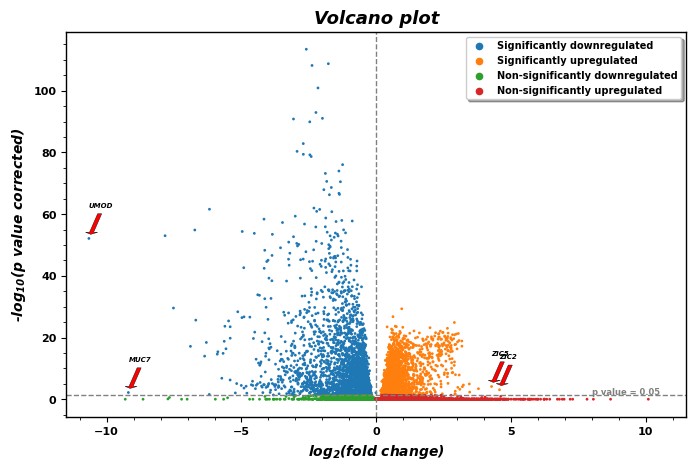

In [68]:
# task 5: volcano plot 
# part 2: action

plt.rcParams["figure.figsize"] = (8, 5) # figure size
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Verdana:italic:bold'

# the plot itself
res = sns.scatterplot(
    data=diffexpr, 
    x='logFC', 
    y='log_pval', 
    hue='sector', # for different colors
    s=4, # dot size
    linewidth=0 # no white dot lineage
    ) 

res.axhline(1.297575, c='grey', lw=1, ls='--') # horizontal line
res.axvline(0, c='grey', lw=1, ls='--') #vertical line
plt.text(8, 1.7, 'p value = 0.05', size=6, color='grey', weight='semibold') # label for p-value

plt.xlabel(r'$\bf{log_2}$(fold change)', size=10, weight='bold', style='italic') # label for x axis
plt.ylabel(r'-$\bf{log_{10}}$(p value corrected)', size=10, weight='bold', style='italic') # label for y axis

plt.title('Volcano plot', size=13, weight='bold', style='italic') # title
plt.tick_params(axis='both', which='major', labelsize=8) # ticks

res.xaxis.set_minor_locator(MultipleLocator(1)) # smaller ticks for x axis
res.yaxis.set_minor_locator(MultipleLocator(5)) # smaller ticks for y axis

plt.xlim([-11.5, 11.5]) # x axis scale

for axis in ['top','bottom','left','right']:
    res.spines[axis].set_linewidth(1) # a little more wide plot borders

l = res.legend(title=None, shadow=True, facecolor='white', fontsize=7, markerscale=0.75) # legend settings

for i in range(4):
    plt.text( # add gene name to the plot
        x=top_genes[i][0],
        y=top_genes[i][1] + 10, 
        s=top_genes[i][2], 
        size=5, 
        style='italic', 
        weight='bold'
        )
    plt.arrow( # add an arrow
        x=top_genes[i][0] + 0.4, 
        y=top_genes[i][1] + 8, 
        dx=-0.3, 
        dy=-6, 
        width=0.15, 
        fill=True, 
        edgecolor='black', 
        facecolor='red', 
        linewidth=0.3
        )
;
# plt.savefig('volcano_plot', bbox_inches='tight', dpi=800)

In [69]:
# task 6: Pie chart

from matplotlib.patches import ConnectionPatch
from matplotlib.collections import PatchCollection



In [70]:
# synthesis of data

names = []
for i in range(1, 17):
    names.append(f'Group_{i}')
names.append('Other')
masses = [8.5, 8.5, 3.8, 2.46, 6.26, 6.94, 8.95, 1.12, 6.94, 1.34, 2.46, 2.24, 3.13, 0.22, 3.36, 2.24, 31.54]
other = [27, 19, 8, 7, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
expl = [0.01] * 16
expl.append(0.05)

In [71]:
# some data and labels

pie_data = []
bar_data = []
labels = []
for i in range(len(names)):
    pie_data.append((names[i], masses[i]))
    labels.append(f'{names[i]}\n{masses[i]}%')
for i in range(len(other)):
    bar_data.append((other[i], other[i]))

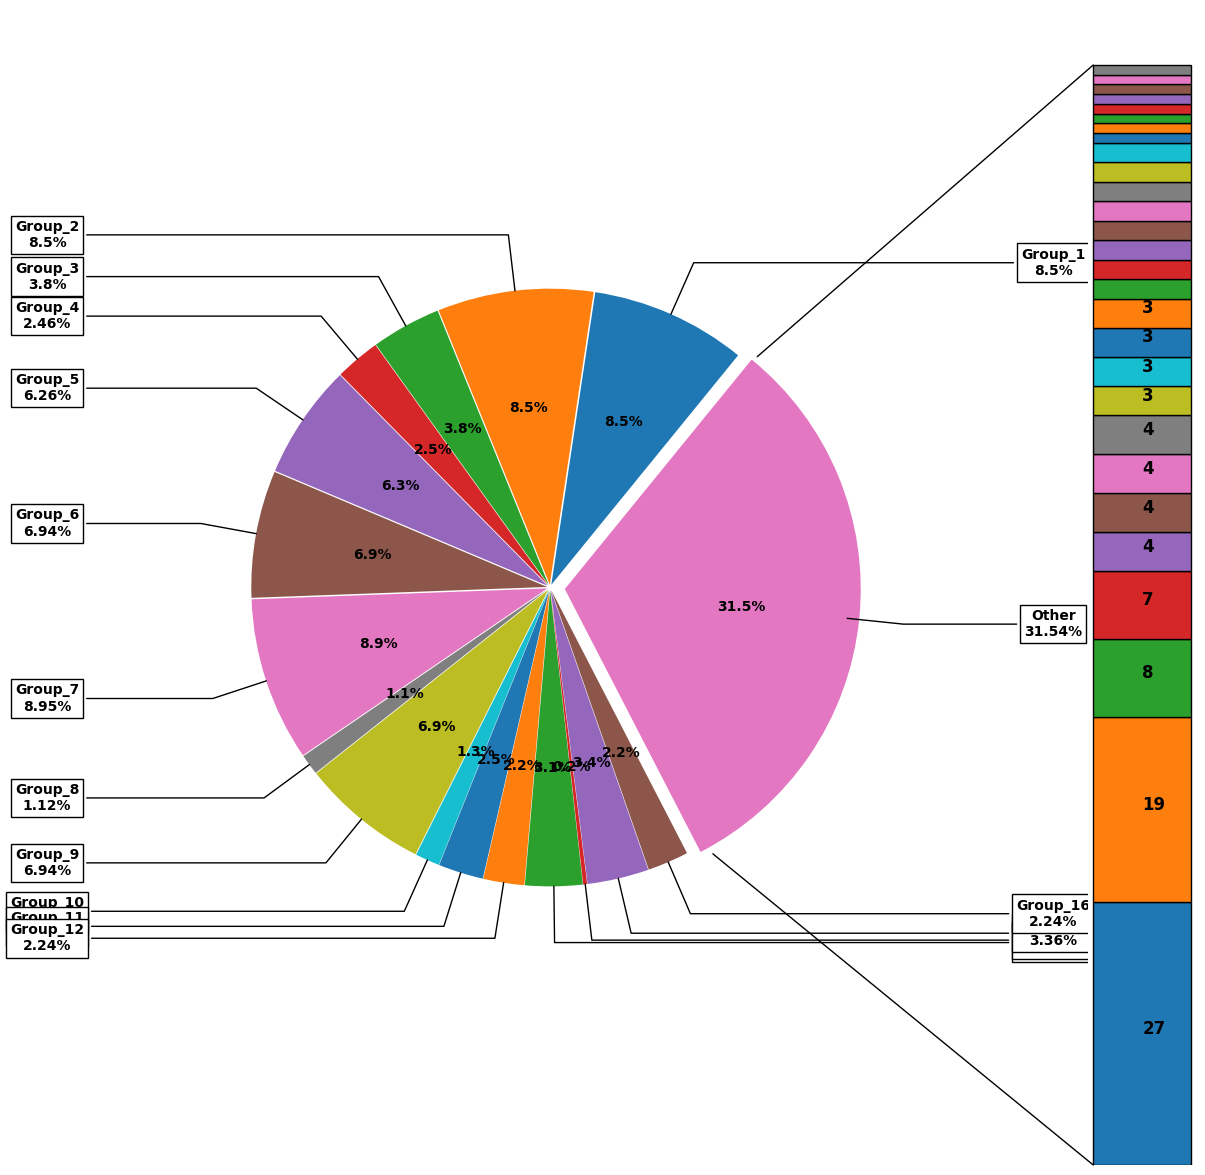

In [72]:
# make the plot omg i don't understand why it works

# plots themselves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 15), subplot_kw=dict(aspect="equal"), gridspec_kw={'width_ratios': [3, 1]})


palette_color = sns.color_palette()

# put others sector on its place
vals_sum = sum(masses)
others_prop = sum(other) / vals_sum # other to the right
start_angle = 45 * others_prop



# lines between the piechart and barplot omg i nearly died
con1 = ConnectionPatch(xyA=(0.55, -0.9),
                       xyB=(-4, -0),
                       coordsA=ax1.transData,
                       coordsB=ax2.transData,
                       axesA=ax2,
                       axesB=ax1,
                       color="black",
                       zorder=999)
con2 = ConnectionPatch(xyA=(0.7, 0.78),
                       xyB=(-4, 113),
                       coordsA=ax1.transData,
                       coordsB=ax2.transData,
                       axesA=ax2,
                       axesB=ax1,
                       color="black",
                       zorder=999)

ax2.add_artist(con1)
ax2.add_artist(con2)

wedges, texts, _ = ax1.pie(masses,
                           labels=None,
                           colors=palette_color,
                           explode=expl, 
                           startangle=start_angle, 
                           autopct='%.1f%%',
                           wedgeprops=dict(width=1),
                           labeldistance=None)

bbox_props = dict(boxstyle="square,pad=0.3", edgecolor="k", facecolor="white", lw=1) # labels in boxes settings
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props,
          zorder=1,
          va="center")

# labels around piechart
for i, p in enumerate(wedges):
    ang = ((p.theta2 - p.theta1) / 2) + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    x_text_coord = 1.7 * np.sign(x)
    y_text_coord = 1.2 * y 

    ax1.annotate(labels[i],
                 xy=(x, y),
                 xytext=(x_text_coord, y_text_coord),
                 horizontalalignment="center",
                 **kw)

### horizontal barplot
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

def font_size(shift):
    if shift > 0.01:
        return 12
    elif shift > 0.05:
        return 10
    else:
        return 8

# Create vertical barplot
# Actually, a sequence of barplots on top of each other
prev_sum = 0
for i in bar_data:
    val = i[0]
    ax2.bar(1, val, width=10, bottom=prev_sum, edgecolor="black")
    prev_sum += val
    shift = val / 2
    label_num = i[0]
    if shift > 1:
        fontsize = font_size(shift)
        ax2.annotate(label_num, xy=(1, prev_sum), xytext=(1.03, prev_sum - shift), horizontalalignment="left", fontsize=fontsize)

plt.show()

In [73]:
# task 7: covid data eda

covid = pd.read_csv("owid-covid-data.csv")

In [74]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [75]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220343 entries, 0 to 220342
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    220343 non-null  object 
 1   continent                                   207670 non-null  object 
 2   location                                    220343 non-null  object 
 3   date                                        220343 non-null  object 
 4   total_cases                                 211377 non-null  float64
 5   new_cases                                   211112 non-null  float64
 6   new_cases_smoothed                          209916 non-null  float64
 7   total_deaths                                192273 non-null  float64
 8   new_deaths                                  192215 non-null  float64
 9   new_deaths_smoothed                         191035 non-null  float64
 

In [76]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.113770e+05,2.111120e+05,2.099160e+05,1.922730e+05,192215.000000,191035.000000,210410.000000,210145.000000,208954.000000,191319.000000,...,136802.000000,134929.000000,88782.000000,160664.000000,205868.000000,176100.000000,7.460000e+03,7460.000000,7507.000000,7460.000000
mean,4.255726e+06,1.246875e+04,1.250363e+04,7.270161e+04,141.395906,142.112030,57243.021817,190.181893,189.702681,676.182104,...,10.674214,32.808133,50.840708,3.084586,73.627345,0.724863,4.709611e+04,9.798906,14.503727,1303.267724
std,2.666748e+07,8.599124e+04,8.407941e+04,3.745871e+05,739.162159,724.681826,102410.645620,1051.298162,649.953240,962.951777,...,10.623786,13.533849,31.840131,2.550048,7.447437,0.149691,1.305588e+05,13.596222,26.623740,1698.241936
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,4.044000e+03,0.000000e+00,6.429000e+00,1.100000e+02,0.000000,0.000000,1018.070000,0.000000,1.398000,28.451000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,2.867500e+01,0.430000,-0.160000,19.952271
50%,4.653400e+04,5.700000e+01,9.714300e+01,1.129000e+03,1.000000,1.571000,9732.231000,8.101000,19.881000,204.223000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.716250e+03,7.300000,7.380000,772.399627
75%,5.030220e+05,9.790000e+02,1.143322e+03,9.555000e+03,15.000000,16.286000,68898.069750,99.497000,136.717500,1000.745500,...,19.300000,41.300000,82.502000,4.200000,79.070000,0.845000,3.355805e+04,15.362500,20.150000,2022.755636
max,6.175839e+08,4.081621e+06,3.436126e+06,6.545452e+06,17737.000000,14858.143000,656238.177000,195005.313000,36401.607000,6423.609000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.250000,9766.306877


In [77]:
print(covid.nunique())

iso_code                                      244
continent                                       6
location                                      244
date                                         1005
total_cases                                113569
                                            ...  
human_development_index                       154
excess_mortality_cumulative_absolute         7215
excess_mortality_cumulative                  3470
excess_mortality                             4268
excess_mortality_cumulative_per_million      7429
Length: 67, dtype: int64


In [78]:
covid.columns # very useful for query

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [79]:
covid.isnull().sum()

iso_code                                        0
continent                                   12673
location                                        0
date                                            0
total_cases                                  8966
                                            ...  
human_development_index                     44243
excess_mortality_cumulative_absolute       212883
excess_mortality_cumulative                212883
excess_mortality                           212836
excess_mortality_cumulative_per_million    212883
Length: 67, dtype: int64

In [80]:
covid.dropna(subset='continent').isnull().sum()

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                  8959
                                            ...  
human_development_index                     32553
excess_mortality_cumulative_absolute       200210
excess_mortality_cumulative                200210
excess_mortality                           200163
excess_mortality_cumulative_per_million    200210
Length: 67, dtype: int64

In [81]:
covid_continents = covid\
    .groupby(['continent', 'date'])\
    .agg({'total_cases': 'sum', 'new_cases': 'sum'})\
    .reset_index()\
    .sort_values('date')
covid_continents

,continent,date,total_cases,new_cases
2953,North America,1/1/2020,0.0,0.0
4936,South America,1/1/2020,0.0,0.0
0,Africa,1/1/2021,2788203.0,27749.0
1969,Europe,1/1/2021,24072742.0,236158.0
2954,North America,1/1/2021,23410507.0,201035.0
...,...,...,...,...
1968,Asia,9/9/2022,181702433.0,211057.0
3956,North America,9/9/2022,112973711.0,106572.0
4935,Oceania,9/9/2022,12243688.0,2061.0
2952,Europe,9/9/2022,224972423.0,150365.0


<AxesSubplot: xlabel='date', ylabel='new cases per day'>

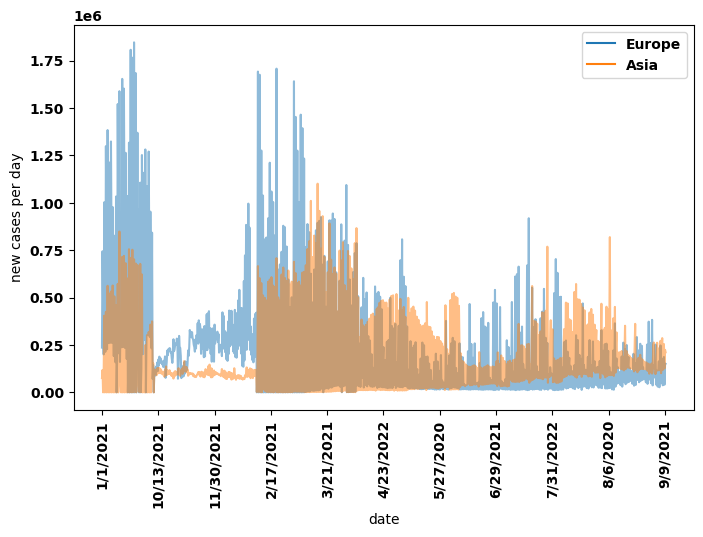

In [82]:
total_cases_plot = sns.lineplot(covid_continents.query('continent == "Europe" or continent == "Asia"'), x='date', y='new_cases', hue='continent', alpha=0.5)
plt.xticks(ticks=range(0, 1100, 100), rotation=90)
plt.ylabel('new cases per day')
plt.legend(loc='upper right')

total_cases_plot

# well okay why so little new cases between 10/13/2021 and 2/17/2021?
# new strain? lack of information? lack of tests?

/tmp/ipykernel_10316/1863204953.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid.corr(), xticklabels=True, yticklabels=True)


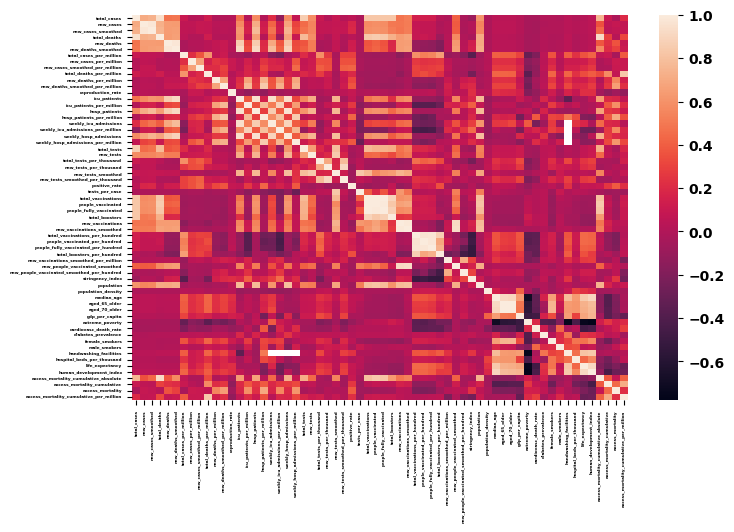

In [83]:
sns.heatmap(covid.corr(), xticklabels=True, yticklabels=True)
plt.tick_params(axis='both', which='major', labelsize=3) # ticks

# plt.savefig('covid correlations', bbox_inches='tight', dpi=800)

In [135]:
covid_without_repeat = covid[[
       'location', 
       'total_cases_per_million',
       'new_cases_per_million', 
       'total_deaths_per_million', 
       'new_deaths_per_million',
       'reproduction_rate',
       'icu_patients_per_million',
       'hosp_patients_per_million', 
       'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions_per_million',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 
       'new_vaccinations', 
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million']]

/tmp/ipykernel_10316/4127394821.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_without_repeat.corr(), xticklabels=True, yticklabels=True)


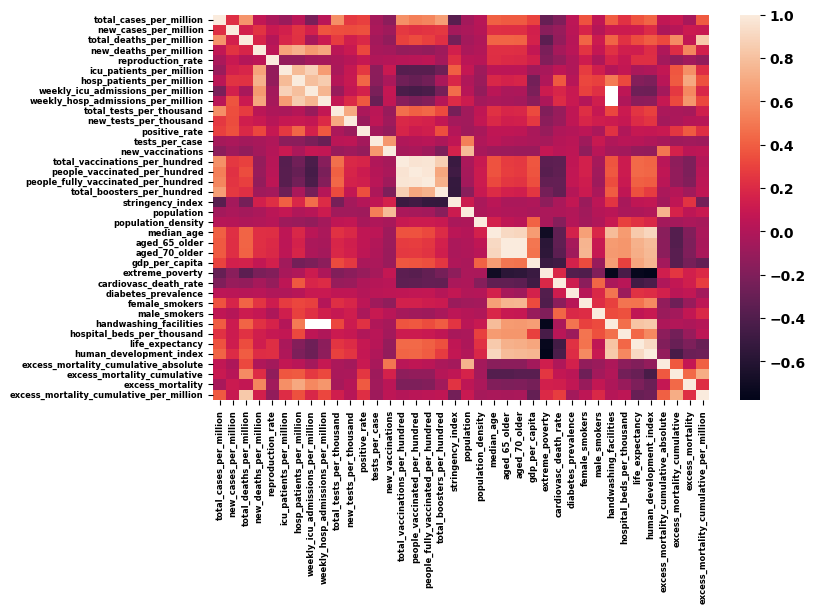

In [98]:
sns.heatmap(covid_without_repeat.corr(), xticklabels=True, yticklabels=True)
plt.tick_params(axis='both', which='major', labelsize=6) # ticks

# i want a carpet like this or a poncho maybe

<AxesSubplot: xlabel='extreme_poverty', ylabel='life_expectancy'>

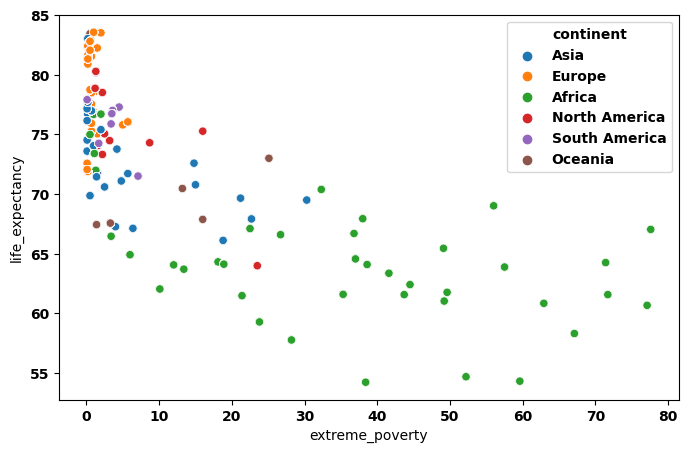

In [86]:
sns.scatterplot(data=covid, x='extreme_poverty', y='life_expectancy', hue='continent')
# less poor is the country, more life expectancy? maybe, not so clear

In [87]:
smokers = covid.query('female_smokers > 0 and male_smokers > 0').sort_values('continent')

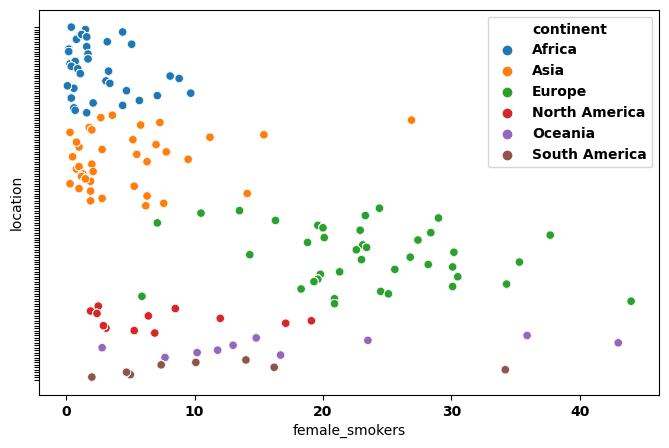

In [131]:
female_smok = sns.scatterplot(data=smokers, x='female_smokers', y='location', hue='continent')
female_smok.set(yticklabels=[]);
# mostly women smoke in Europe

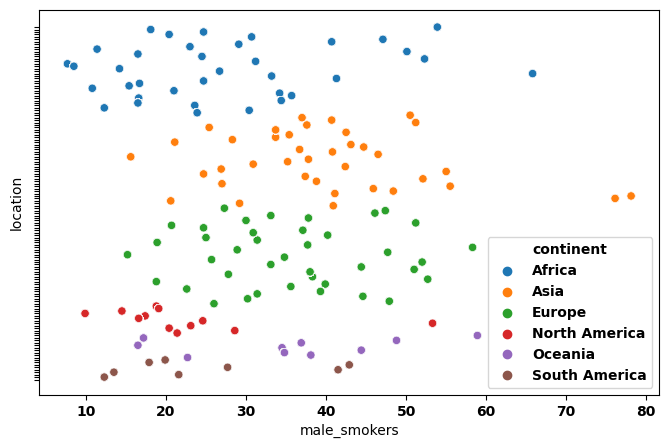

In [132]:
male_smok = sns.scatterplot(data=smokers, x='male_smokers', y='location', hue='continent')
male_smok.set(yticklabels=[]);
# number of smoking men has bigger variety on all continents

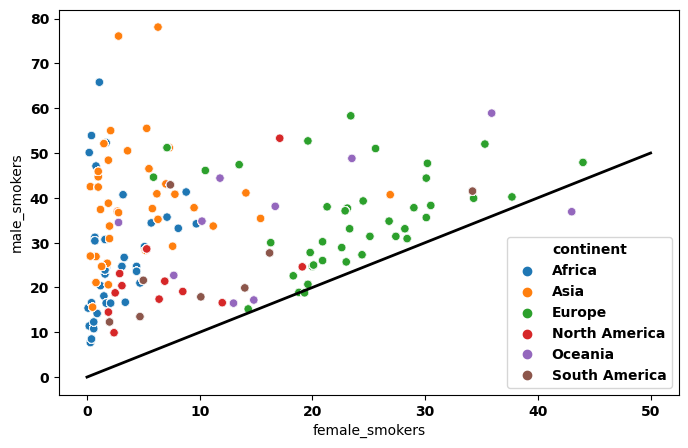

In [124]:
smok = sns.scatterplot(data=smokers, x='female_smokers', y='male_smokers', hue='continent')
plt.plot([0, 50], [0, 50], 'k-', lw=2)

# we see that most countries with the almost same number of smoking men and women are in Europe
# is it because of feminism? 
# or is it just the number of stressed women and men the same?
# i don't have an answer to this question

<AxesSubplot: xlabel='total_vaccinations_per_hundred', ylabel='icu_patients_per_million'>

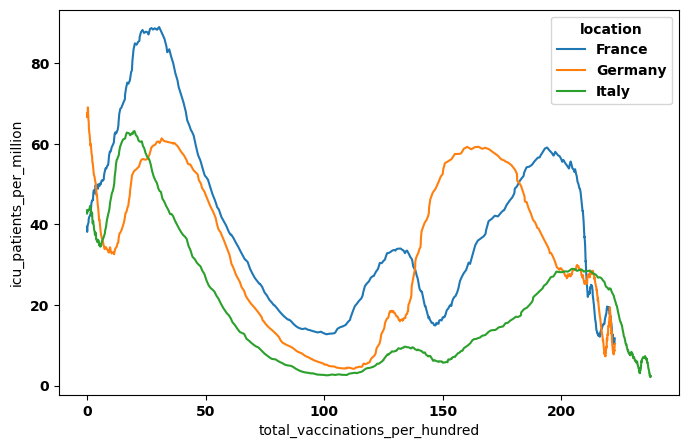

In [118]:
sns.lineplot(data=covid\
    .query('location == "Germany" or location == "France" or location == "Italy"'), 
    x='total_vaccinations_per_hundred', 
    y='icu_patients_per_million', 
    hue='location')

# this is funny, from some point of vaccinated people the number of ICU patients rises
# perhaps because they think that they are invincible due to vaccination
# or because the rules became not so strict 

/tmp/ipykernel_10316/2974210457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_without_repeat.query('location == "France"').corr(), xticklabels=True, yticklabels=True)


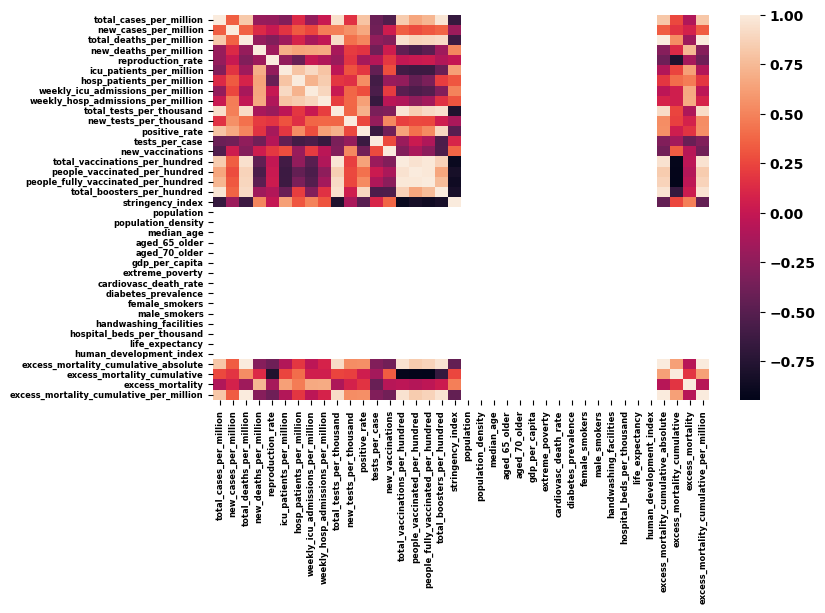

In [136]:
sns.heatmap(covid_without_repeat.query('location == "France"').corr(), xticklabels=True, yticklabels=True)
plt.tick_params(axis='both', which='major', labelsize=6) # ticks

<AxesSubplot: xlabel='total_cases_per_million', ylabel='total_vaccinations_per_hundred'>

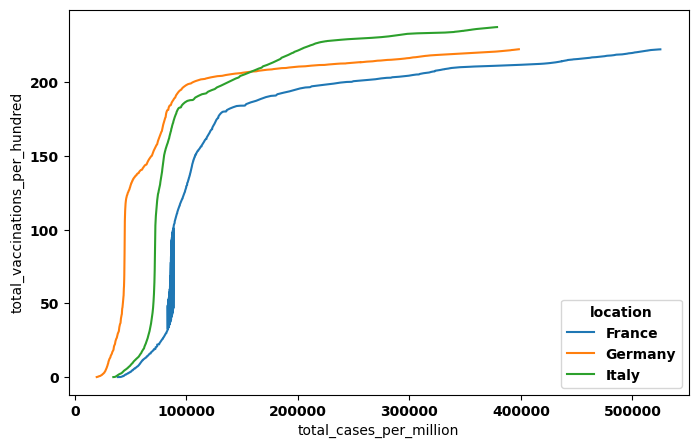

In [142]:
sns.lineplot(data=covid\
    .query('location == "Germany" or location == "France" or location == "Italy"'), 
    y='total_vaccinations_per_hundred', 
    x='total_cases_per_million', 
    hue='location')

# wow! maybe the more cases the more people are motivated to vaccinate?

<AxesSubplot: xlabel='total_cases_per_million', ylabel='total_vaccinations_per_hundred'>

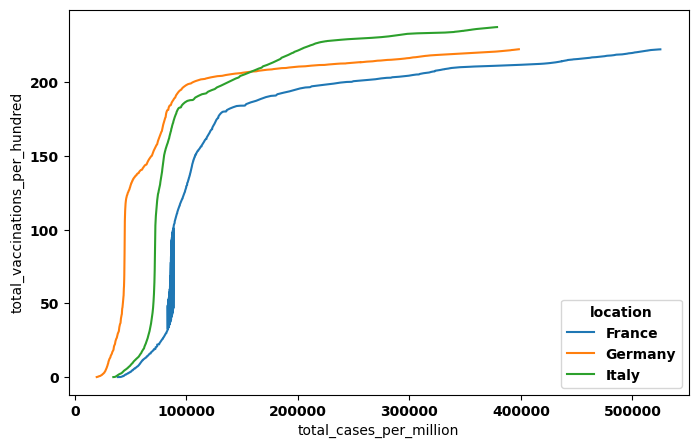

In [141]:
sns.lineplot(data=covid\
    .query('location == "Germany" or location == "France" or location == "Italy"'), 
    y='total_vaccinations_per_hundred', 
    x='total_cases_per_million', 
    hue='location')